In [111]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [112]:
df = pd.read_csv("Datains - Marcella - Price Monitoring TP-Link_TP-Link Price Monitoring_Table.csv")

df.head()

C:\Users\Rizal\AppData\Local\Temp\ipykernel_26056\772601970.py:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Datains - Marcella - Price Monitoring TP-Link_TP-Link Price Monitoring_Table.csv")


,Date,Last Crawling,SKU Name,Product Name,Url Product,Seller,Merchant,Stock,Item Condition,Filter,Flag,Bottom Price,Original Price,Discount,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
0,"Oct 22, 2022","Oct 22, 2022",TL WR840N,TP-Link TL-WR840N 2 Antenna 300Mbps Wireless N...,https://tokopedia.com/ccplace/tp-link-tl-wr840...,ccplace shop,tokopedia,In Stock,baru,Above,Please Check,155000,231000,0,231000,0.014903,0,0
1,"Oct 22, 2022","Oct 22, 2022",TL WR840N,Promo TP-LINK TL-WR840N Wireless Router 300Mbp...,https://tokopedia.com/gilsaashopp/promo-tp-lin...,gilsaa_shopp,tokopedia,In Stock,baru,Above,Please Check,155000,218800,0,218800,0.014116,0,0
2,"Oct 22, 2022","Oct 22, 2022",TL WR840N,Tp-Link TL-WR840N 300Mbps Wireless N Speed Rou...,https://tokopedia.com/ccwinta/tp-link-tl-wr840...,ccwinta shop,tokopedia,In Stock,baru,Above,Please Check,155000,227000,0,227000,0.014645,0,0
3,"Oct 22, 2022","Oct 22, 2022",TL WR840N,JARINGAN TP-LINK TL-WR 840N TL-WR840N 300MBps ...,https://tokopedia.com/belsa/jaringan-tp-link-t...,BELSA_SHOP,tokopedia,In Stock,baru,Above,Please Check,155000,263000,0,263000,0.016968,0,0
4,"Oct 22, 2022","Oct 22, 2022",TL WR840N,TPLink TL-WR840N Router Wireless WiFi 300Mbps ...,https://tokopedia.com/ccwinta/tplink-tl-wr840n...,ccwinta shop,tokopedia,In Stock,baru,Above,Please Check,155000,236000,0,236000,0.015226,0,0


In [113]:
df["Discount"].value_counts().sort_values(ascending=False)
# df["Original Price"] == df["Selling Price"]

Discount
0       32642
0.02       26
0.2         8
0.05        8
0.1         8
0.03        7
0.09        6
0.07        4
0.08        4
0.11        4
0.35        4
0           4
0.01        3
0.06        3
0.62        3
0.16        3
0.23        3
0.29        3
0.13        2
0.63        2
-           2
0.24        2
0.53        2
0.15        2
0.54        2
0.5         1
0.6         1
0.18        1
0.48        1
0.32        1
0.83        1
0.4         1
0.36        1
0.12        1
0.22        1
0.59        1
0.46        1
0.31        1
0.14        1
0.17        1
Name: count, dtype: int64

In [114]:
df.drop(columns=["SKU Name", "Product Name", "Url Product", "Seller", "Merchant", "Stock", "Bottom Price", "Item Condition", "Filter",	"Flag"], inplace=True)

In [115]:
df.head()

,Date,Last Crawling,Original Price,Discount,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
0,"Oct 22, 2022","Oct 22, 2022",231000,0,231000,0.014903,0,0
1,"Oct 22, 2022","Oct 22, 2022",218800,0,218800,0.014116,0,0
2,"Oct 22, 2022","Oct 22, 2022",227000,0,227000,0.014645,0,0
3,"Oct 22, 2022","Oct 22, 2022",263000,0,263000,0.016968,0,0
4,"Oct 22, 2022","Oct 22, 2022",236000,0,236000,0.015226,0,0


In [116]:
(df["Last Crawling"] == df["Date"]).unique()

array([ True])

In [117]:
df.drop(columns="Last Crawling", inplace=True)

In [118]:
df.Date.unique()[::-1]

array(['Sep 20, 2022', 'Sep 29, 2022', 'Sep 30, 2022', 'Oct 1, 2022',
       'Oct 2, 2022', 'Oct 3, 2022', 'Oct 4, 2022', 'Oct 5, 2022',
       'Oct 6, 2022', 'Oct 7, 2022', 'Oct 10, 2022', 'Oct 12, 2022',
       'Oct 13, 2022', 'Oct 14, 2022', 'Oct 15, 2022', 'Oct 18, 2022',
       'Oct 19, 2022', 'Oct 22, 2022'], dtype=object)

In [119]:
df.Date = df.Date.map({'Sep 20, 2022':1, 'Sep 29, 2022':10, 'Sep 30, 2022':11, 'Oct 1, 2022':12,
       'Oct 2, 2022':13, 'Oct 3, 2022':14, 'Oct 4, 2022':15, 'Oct 5, 2022':16,
       'Oct 6, 2022':17, 'Oct 7, 2022':18, 'Oct 10, 2022':21, 'Oct 12, 2022':23,
       'Oct 13, 2022':24, 'Oct 14, 2022':25, 'Oct 15, 2022':26, 'Oct 18, 2022':29,
       'Oct 19, 2022':30, 'Oct 22, 2022':33})

df.tail()

,Date,Original Price,Discount,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
32767,1,244000,0,244000,0.015742,0,0
32768,1,212000,0,212000,0.013677,0,0
32769,1,271733,0,271733,0.017531,0,0
32770,1,210000,0,210000,0.013548,0,0
32771,1,274900,0,274900,0.017735,0,0


Date              0
Original Price    0
Discount          0
Selling Price     0
Discrepancy       0
Sales Quantity    0
Sales Revenue     0
dtype: int64

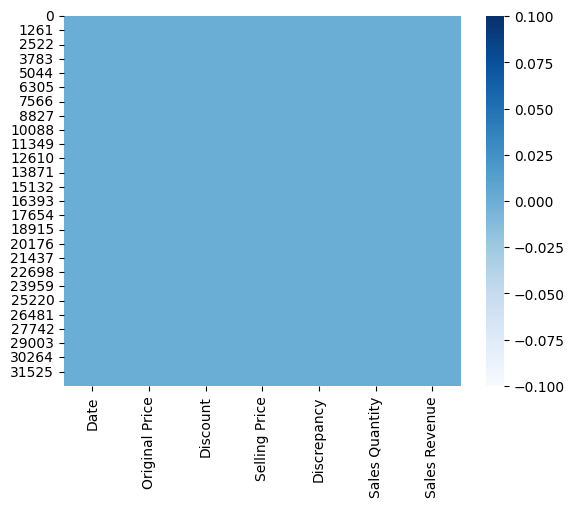

In [120]:
sns.heatmap(df.isna(), cmap="Blues")
df.isna().sum()

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32772 entries, 0 to 32771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            32772 non-null  int64  
 1   Original Price  32772 non-null  object 
 2   Discount        32772 non-null  object 
 3   Selling Price   32772 non-null  int64  
 4   Discrepancy     32772 non-null  float64
 5   Sales Quantity  32772 non-null  int64  
 6   Sales Revenue   32772 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 1.8+ MB


In [122]:
df.replace("-", 0, inplace=True)

In [123]:
df["Original Price"] = df["Original Price"].astype(float)
df["Discount"] = df["Discount"].astype(float)

<Axes: >

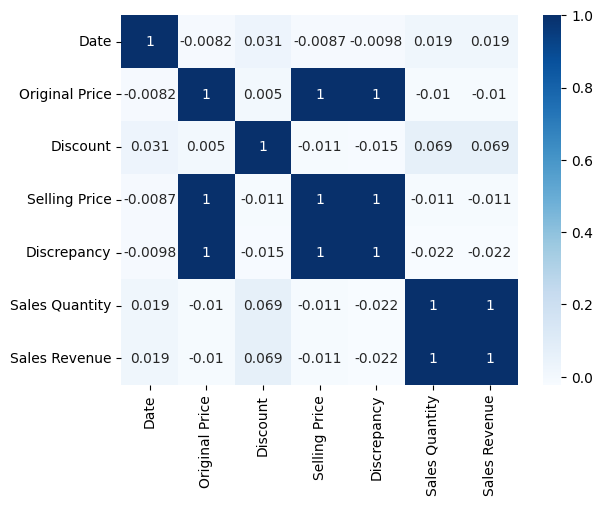

In [124]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")

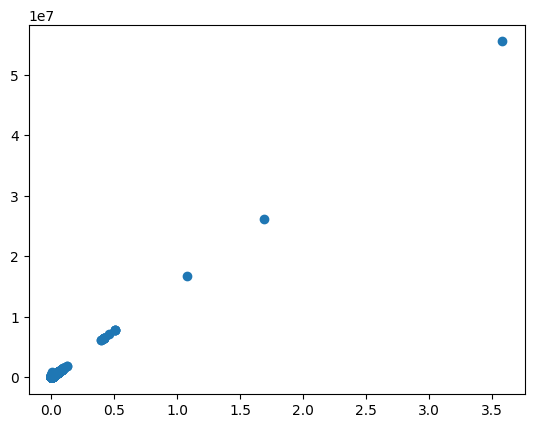

In [127]:
plt.scatter(df["Discrepancy"], df["Original Price"])

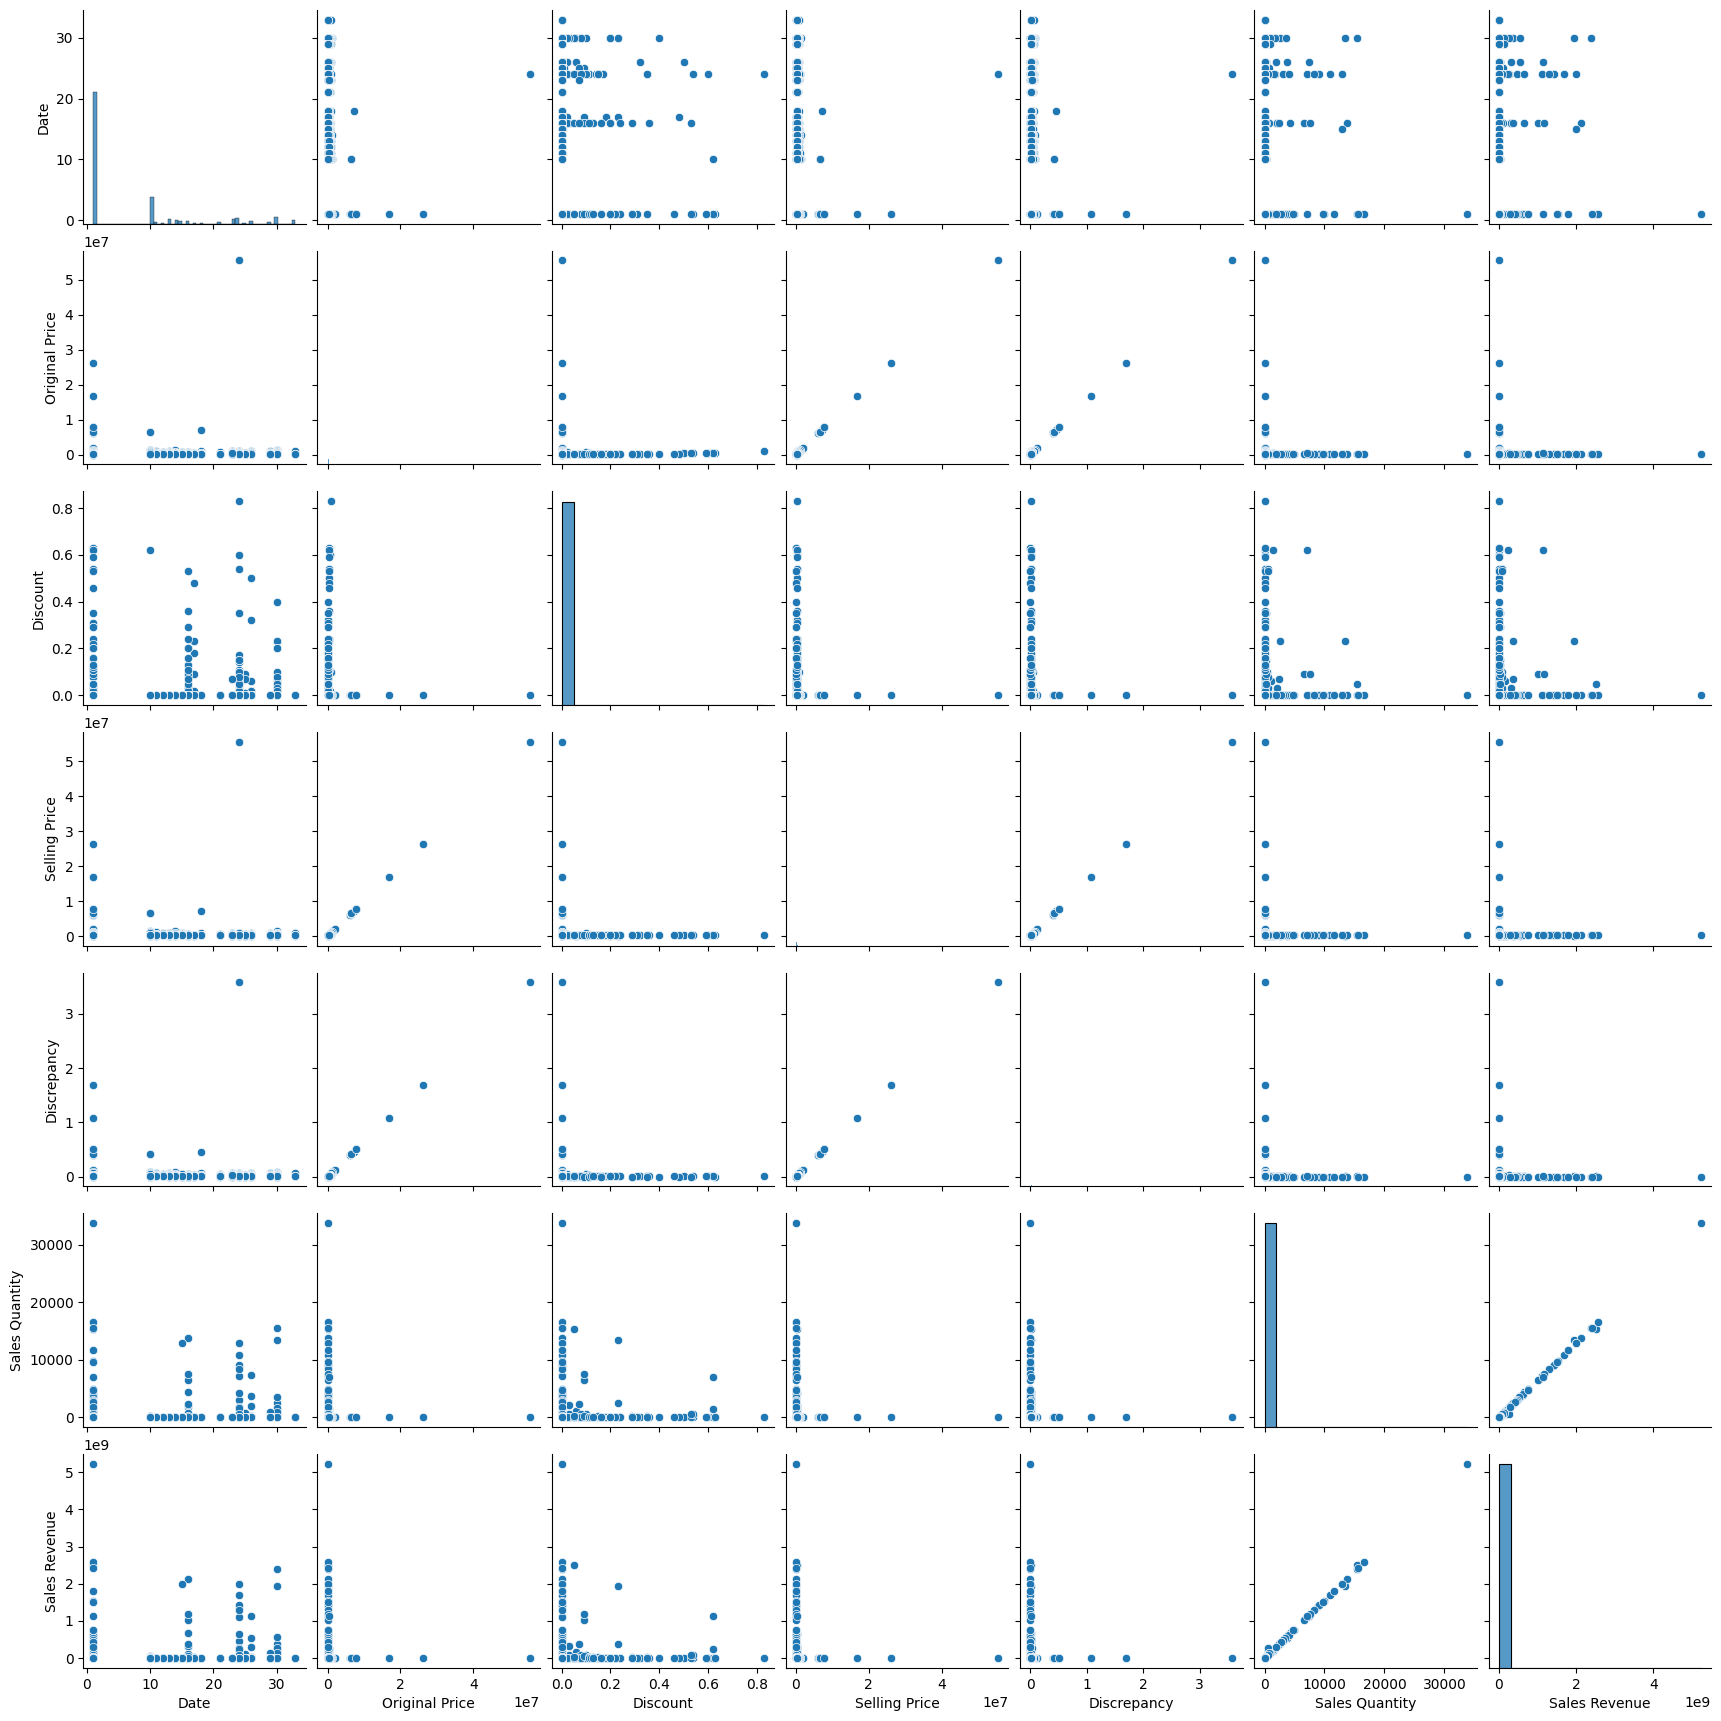

In [126]:
sns.pairplot(df)